[0. 0. 1. 0. 0. 0. 0. 0.]


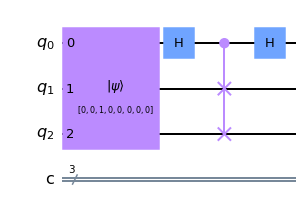

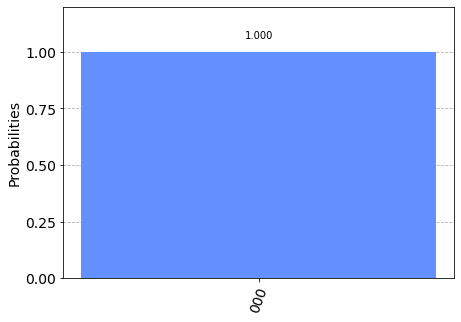

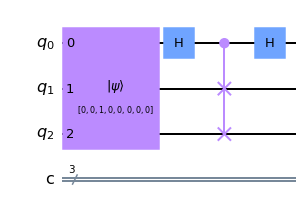

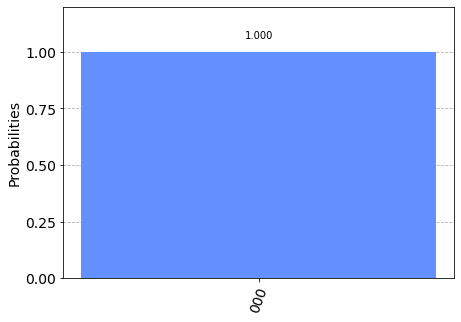

In [13]:
# Import qiskit and call it q for short so we can construct,simulate, and run quantum circuits!
import qiskit as q
# Import Numpy and call it np so we can do maths!
import numpy as np

# Import the python plotting module of matplotlib and call it plt so we can draw graphs!
import matplotlib.pyplot as plt
# Tell matplotlib that we are in an Ipython notebook
%matplotlib inline

Q0=np.array([1,0])                    # |0>
state1=np.array([0,1])                # first state vector to compare
state2=np.array([1,0])                # second state vector to compare

state1=np.sqrt(state1/np.sum(state1))
state2=np.sqrt(state2/np.sum(state2))

qstate=np.kron(state1,state2) # tensor product of state1 and state2
qstate=np.kron(Q0,qstate) # tensor product of Q0 and the other states

print(qstate)

# this is a faulty program, the state is not correctly represented
# but how should the state be prepared to combine a |0> qubit with another arbitrary state
# so the swab test gives meaningful results for equal and different states
# is it the order or is there a way to intialise qubits separately???

#qr=q.QuantumRegister(3)

qreg_q = q.QuantumRegister(3, 'q')
creg_c = q.ClassicalRegister(3, 'c')
circuit = q.QuantumCircuit(qreg_q, creg_c)

circuit.initialize(qstate,qreg_q)

circuit.h(qreg_q[0])
circuit.cswap(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[0])



display(circuit.draw(output="mpl"))


# Drawing the histogram

backend = q.Aer.get_backend('qasm_simulator')
job = q.execute(circuit, backend, shots=100)
result = job.result()
counts = result.get_counts(circuit)


graph = q.visualization.plot_histogram(counts)



display(graph)


